GRIDWORLD Q-LEARNING IMPLEMENTATION

Gridworld Layout:
 S  .  .  .  . 
 .  X  .  X  . 
 .  .  X  .  . 
 .  X  .  X  . 
 .  .  .  .  G 

Training Parameters:
  Learning rate (α): 0.1
  Discount factor (γ): 0.99
  Exploration rate (ε): 0.1
  Episodes: 1000
------------------------------------------------------------

Training Q-Learning Agent...
Episode 100/1000, Avg Reward (last 100): 82.03
Episode 200/1000, Avg Reward (last 100): 91.12
Episode 300/1000, Avg Reward (last 100): 90.85
Episode 400/1000, Avg Reward (last 100): 91.17
Episode 500/1000, Avg Reward (last 100): 91.19
Episode 600/1000, Avg Reward (last 100): 90.46
Episode 700/1000, Avg Reward (last 100): 90.99
Episode 800/1000, Avg Reward (last 100): 91.29
Episode 900/1000, Avg Reward (last 100): 91.23
Episode 1000/1000, Avg Reward (last 100): 90.42

TRAINING COMPLETED

Optimal Policy:
(Action to take from each state)
  S    ←    →    →    ↓  
  ↓    X    ←    X    ↓  
  ↓    ←    X    →    ↓  
  ↓    X    ↓    X    ↓  
  →    → 

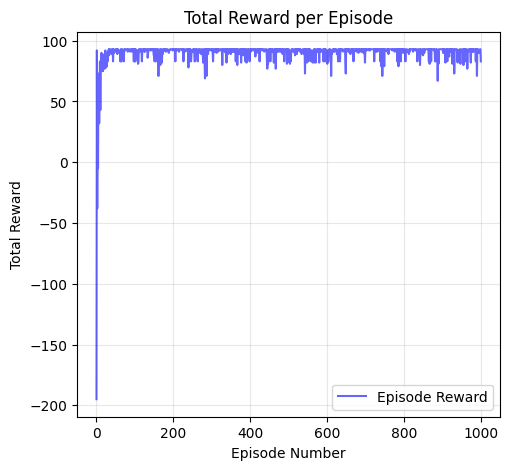

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# ============================================
# Task 1: Implement Gridworld Environment
# ============================================

class Gridworld:
    """5x5 Gridworld Environment"""

    def __init__(self):
        self.grid_size = 5
        self.start_state = (0, 0)
        self.goal_state = (4, 4)
        self.obstacles = [(1, 1), (2, 2), (3, 1), (3, 3), (1, 3)]

        # Actions: 0=UP, 1=DOWN, 2=LEFT, 3=RIGHT
        self.actions = [0, 1, 2, 3]
        self.action_names = ['UP', 'DOWN', 'LEFT', 'RIGHT']

        # Action effects (row_change, col_change)
        self.action_effects = {
            0: (-1, 0),  # UP
            1: (1, 0),   # DOWN
            2: (0, -1),  # LEFT
            3: (0, 1)    # RIGHT
        }

    def is_valid_state(self, state):
        """Check if state is within grid bounds"""
        row, col = state
        return 0 <= row < self.grid_size and 0 <= col < self.grid_size

    def is_obstacle(self, state):
        """Check if state is an obstacle"""
        return state in self.obstacles

    def is_terminal(self, state):
        """Check if state is terminal (goal)"""
        return state == self.goal_state

    def step(self, state, action):
        """
        Execute action from state and return (next_state, reward, done)
        """
        if self.is_terminal(state):
            return state, 0, True

        # Calculate next state
        row, col = state
        d_row, d_col = self.action_effects[action]
        next_state = (row + d_row, col + d_col)

        # Check if next state is valid
        if not self.is_valid_state(next_state):
            # Hit boundary - stay in same state
            return state, -1, False

        if self.is_obstacle(next_state):
            # Hit obstacle - stay in same state, penalty
            return state, -10, False

        # Valid move
        if self.is_terminal(next_state):
            return next_state, 100, True
        else:
            return next_state, -1, False

    def reset(self):
        """Reset environment to start state"""
        return self.start_state

    def visualize_grid(self):
        """Print the grid layout"""
        print("\nGridworld Layout:")
        for i in range(self.grid_size):
            row_str = ""
            for j in range(self.grid_size):
                if (i, j) == self.start_state:
                    row_str += " S "
                elif (i, j) == self.goal_state:
                    row_str += " G "
                elif (i, j) in self.obstacles:
                    row_str += " X "
                else:
                    row_str += " . "
            print(row_str)
        print()


# ============================================
# Task 2: Implement Q-Learning
# ============================================

class QLearningAgent:
    """Q-Learning Agent"""

    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.env = env
        self.alpha = alpha      # Learning rate
        self.gamma = gamma      # Discount factor
        self.epsilon = epsilon  # Exploration rate

        # Initialize Q-table using defaultdict for cleaner handling
        self.Q = defaultdict(lambda: np.zeros(len(env.actions)))

    def select_action(self, state):
        """Epsilon-greedy action selection"""
        if np.random.random() < self.epsilon:
            # Explore: random action
            return np.random.choice(self.env.actions)
        else:
            # Exploit: best action
            return np.argmax(self.Q[state])

    def update_q_value(self, state, action, reward, next_state, done):
        """Q-Learning update rule"""
        if done:
            # Terminal state: no future rewards
            target = reward
        else:
            # Q-Learning: use max Q-value of next state
            target = reward + self.gamma * np.max(self.Q[next_state])

        # Q(s,a) ← Q(s,a) + α[target - Q(s,a)]
        self.Q[state][action] += self.alpha * (target - self.Q[state][action])

    def train(self, episodes=1000):
        """Train the agent for specified number of episodes"""
        episode_rewards = []

        for episode in range(episodes):
            state = self.env.reset()
            total_reward = 0
            done = False

            while not done:
                # Select action using ε-greedy
                action = self.select_action(state)

                # Take action and observe result
                next_state, reward, done = self.env.step(state, action)

                # Update Q-value
                self.update_q_value(state, action, reward, next_state, done)

                # Update state and accumulate reward
                state = next_state
                total_reward += reward

            episode_rewards.append(total_reward)

            # Print progress every 100 episodes
            if (episode + 1) % 100 == 0:
                avg_reward = np.mean(episode_rewards[-100:])
                print(f"Episode {episode + 1}/{episodes}, Avg Reward (last 100): {avg_reward:.2f}")

        return episode_rewards

    def get_optimal_policy(self):
        """Extract optimal policy from Q-table"""
        policy = {}
        for i in range(self.env.grid_size):
            for j in range(self.env.grid_size):
                state = (i, j)
                if state not in self.env.obstacles and state != self.env.goal_state:
                    best_action = np.argmax(self.Q[state])
                    policy[state] = self.env.action_names[best_action]
        return policy


# ============================================
# Task 3: Extract Optimal Policy
# ============================================

def visualize_policy(agent):
    """Visualize the optimal policy on the grid"""
    policy = agent.get_optimal_policy()
    env = agent.env

    print("\nOptimal Policy:")
    print("(Action to take from each state)")
    for i in range(env.grid_size):
        row_str = ""
        for j in range(env.grid_size):
            state = (i, j)
            if state == env.start_state:
                row_str += "  S  "
            elif state == env.goal_state:
                row_str += "  G  "
            elif state in env.obstacles:
                row_str += "  X  "
            elif state in policy:
                action = policy[state]
                arrow = {'UP': '  ↑  ', 'DOWN': '  ↓  ',
                        'LEFT': '  ←  ', 'RIGHT': '  →  '}
                row_str += arrow.get(action, action[:2].ljust(5))
            else:
                row_str += "  .  "
        print(row_str)
    print()


def print_q_values(agent):
    """Print Q-values for key states"""
    env = agent.env
    print("\nSample Q-values:")
    key_states = [(0, 0), (0, 1), (1, 0), (4, 3)]

    for state in key_states:
        if state not in env.obstacles:
            print(f"State {state}:")
            for i, action in enumerate(env.action_names):
                print(f"  {action:>5}: {agent.Q[state][i]:>7.2f}")
            print()


# ============================================
# Task 4: Plot Episode Rewards
# ============================================

def plot_episode_rewards(episode_rewards):
    """Plot total reward per episode with moving average"""
    plt.figure(figsize=(12, 5))

    # Plot 1: Raw episode rewards
    plt.subplot(1, 2, 1)
    plt.plot(episode_rewards, alpha=0.6, color='blue', label='Episode Reward')
    plt.xlabel('Episode Number')
    plt.ylabel('Total Reward')
    plt.title('Total Reward per Episode')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # Plot 2: Moving average (smoother view)
    """plt.subplot(1, 2, 2)
    window = 50
    if len(episode_rewards) >= window:
        moving_avg = np.convolve(episode_rewards, np.ones(window)/window, mode='valid')
        plt.plot(range(window-1, len(episode_rewards)), moving_avg,
                color='red', linewidth=2, label=f'{window}-Episode Moving Average')
        plt.xlabel('Episode Number')
        plt.ylabel('Average Reward')
        plt.title('Learning Progress (Smoothed)')
        plt.grid(True, alpha=0.3)
        plt.legend()

    plt.tight_layout()
    plt.show()"""


# ============================================
# Main Execution
# ============================================

if __name__ == "__main__":
    print("=" * 60)
    print("GRIDWORLD Q-LEARNING IMPLEMENTATION")
    print("=" * 60)

    # Task 1: Create Gridworld environment
    env = Gridworld()
    env.visualize_grid()

    # Task 2: Create Q-Learning agent and train
    print("Training Parameters:")
    print(f"  Learning rate (α): 0.1")
    print(f"  Discount factor (γ): 0.99")
    print(f"  Exploration rate (ε): 0.1")
    print(f"  Episodes: 1000")
    print("-" * 60)

    agent = QLearningAgent(
        env,
        alpha=0.1,
        gamma=0.99,
        epsilon=0.1
    )

    print("\nTraining Q-Learning Agent...")
    episode_rewards = agent.train(episodes=1000)

    print("\n" + "=" * 60)
    print("TRAINING COMPLETED")
    print("=" * 60)

    # Task 3: Extract and visualize optimal policy
    visualize_policy(agent)
    print_q_values(agent)

    # Print final performance statistics
    print("=" * 60)
    print(f"Final Performance:")
    print(f"  Average reward (last 100 episodes): {np.mean(episode_rewards[-100:]):.2f}")
    print(f"  Best episode reward: {max(episode_rewards):.2f}")
    print(f"  Worst episode reward: {min(episode_rewards):.2f}")
    print("=" * 60)

    # Task 4: Plot episode rewards
    plot_episode_rewards(episode_rewards)